WeRateDogs Analysis
======
***
**by:** Constance Martineau

**Objective:** Determine relationship between tweet content and number of favourites

**Purpose of Notebook:** Gather, assess, and clean data in order perform basic feature extraction and initial exploratory data analysis

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from genderize import Genderize

%matplotlib inline

ModuleNotFoundError: No module named 'genderize'

Gather
------
***

#### WeRateDogs Twitter Archive Dataset

In [2]:
# Import data from csv file as pandas df
twitter_archive = pd.read_csv("data\\twitter-archive-enhanced.csv")

#### Image Predictions Dataset

In [3]:
# Download tsv from Udacity server
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('data\\image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [3]:
# Import file as pandas df    
image_predictions = pd.read_csv('data\\image_predictions.tsv', sep='\t')

#### Twitter API

In [5]:
# Personal API keys, secrets, and tokens
consumer_key = 'hIdWdK17R4s69jJRjOMSbInFR'
consumer_secret = 'KOjaTRlvgTrYswxUI8MHD4MOAYxPaPgknDWEe79sUjDkm6Vm83'
access_token = '968897921616760832-gH7p86SbYWEpEFd2uRPFUKbq7LwibWo'
access_secret = 'N31juraLnVEolkaPuvPNA0er9MwhU2vF6uLldIq9yuJXr'

In [6]:
# Tweepy values
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
# add tweet to tweet_json.txt
with open('data\\tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 622
Rate limit reached. Sleeping for: 631


In [4]:
# add tweet to list
tweets_data = []

tweet_file = open('data\\tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [5]:
# convert to pandas df
tweet_info = pd.DataFrame()

In [6]:
# add variables to tweet_info df 
tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [7]:
pd.set_option('display.max_colwidth', -1)

Assess
------
***

### Twitter Archive Data

In [8]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [9]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [10]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2316,666649482315059201,NaN,NaN,2015-11-17 16:09:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Cool dog. Enjoys couch. Low monotone bark. Very nice kicks. Pisses milk (must be rare). Can't go down stairs. 4/10 https://t.co/vXMKrJC81s,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666649482315059201/photo/1,4,10,None,None,None,None,None
1895,674742531037511680,6.747400e+17,4.196984e+09,2015-12-10 00:08:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Some clarification is required. The dog is singing Cher and that is more than worthy of an 11/10. Thank you,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
1627,684594889858887680,NaN,NaN,2016-01-06 04:38:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ALL THE SPOTS ARE GREY DAMN IT CINDY"" ...10/10 https://t.co/uhQNehTpIu",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684594889858887680/photo/1,10,10,None,None,None,None,None
783,775350846108426240,NaN,NaN,2016-09-12 15:10:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Maximus. A little rain won't stop him. He will persevere. 12/10 innovative af https://t.co/2OmDMAkkou,NaN,NaN,NaN,https://vine.co/v/ijmv0PD0XXD,12,10,Maximus,None,None,None,None
31,886258384151887873,NaN,NaN,2017-07-15 16:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Waffles. His doggles are pupside down. Unsure how to fix. 13/10 someone assist Waffles https://t.co/xZDA9Qsq1O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886258384151887873/photo/1,13,10,Waffles,None,None,None,None


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Image Prediction Data

In [13]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [15]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1796,831322785565769729,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,1,Old_English_sheepdog,0.999715,True,Tibetan_terrier,0.000046,True,guinea_pig,0.000041,False
1094,719991154352222208,https://pbs.twimg.com/media/Cf3sH62VAAA-LiP.jpg,2,golden_retriever,0.605304,True,cocker_spaniel,0.130948,True,Labrador_retriever,0.094692,True
812,692530551048294401,https://pbs.twimg.com/media/CZxc3G7WEAAM4Mv.jpg,1,Siberian_husky,0.486428,True,Eskimo_dog,0.448518,True,white_wolf,0.041506,False
846,695314793360662529,https://pbs.twimg.com/media/CaZBErSWEAEdXk_.jpg,2,Maltese_dog,0.678547,True,Lhasa,0.125046,True,Pekinese,0.048999,True
1564,793614319594401792,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,golden_retriever,0.705092,True,Labrador_retriever,0.219721,True,kuvasz,0.015965,True


In [16]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### API Data

In [18]:
tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8552,38668
1,892177421306343426,6287,33128
2,891815181378084864,4166,24942
3,891689557279858688,8681,42047
4,891327558926688256,9439,40196


In [19]:
tweet_info.tail()

,id,retweet_count,favorite_count
2339,666049248165822465,41,109
2340,666044226329800704,141,299
2341,666033412701032449,44,125
2342,666029285002620928,47,130
2343,666020888022790149,517,2566


In [20]:
tweet_info.sample(5)

,id,retweet_count,favorite_count
907,756651752796094464,1461,5467
1396,699072405256409088,1292,3198
1098,733822306246479872,1099,3912
2294,666835007768551424,80,218
64,879492040517615616,3195,23346


In [21]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 3 columns):
id                2344 non-null int64
retweet_count     2344 non-null int64
favorite_count    2344 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [22]:
tweet_info.describe()

,id,retweet_count,favorite_count
count,2.344000e+03,2344.000000,2344.000000
mean,7.422890e+17,3010.273464,8037.467577
std,6.835057e+16,5008.590309,12097.711712
min,6.660209e+17,0.000000,0.000000
25%,6.783704e+17,603.750000,1398.500000
50%,7.187854e+17,1402.000000,3523.500000
75%,7.986989e+17,3502.750000,9936.000000
max,8.924206e+17,77016.000000,142870.000000


### Issues found during Assessment

#### Quality


 Table | Issue   
--- | ---
 Archive | Retweets are found within the dataset   
 Archive | There are columns that need to be converted to a more useable dtype 
 Archive | Missing data in expanded_urls, names, doggo – puppo columns  
 Archive | The rating_numerator, rating_denominator and name columns contain some incorrect values 
 Archive | There are additional characteristics, such as gender, that can be extracted from the text column 
 Image Predictions | There are tweets within the archive that don’t have a corresponding image prediction observation
 Image Predictions | There are columns that need to be converted to a more useable dtype
 API Data | The archive includes tweets that have since been deleted
 

#### Tidy


 Table | Issue 
 --- | --- 
 Archive | The “doggo” to “puppo” columns are observations of the same variable
 Archive | In multiple columns, nulls are presented as “None”
 Archive | The source column contains extended links
 Image Predictions | Dog breeds and other non-dog images are specified as part of the same variable
 All | The data sources are currently stored in three separate dataframes

Clean
------
***

In [23]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

### Define

**Issue**: There are tweets that are included within the dataset that do not contain images.

**Solution:** Drop all rows where the expanded_urls column is null.

### Code

In [24]:
twitter_archive_clean.expanded_urls.isnull().sum()

59

In [25]:
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

### Test

In [26]:
twitter_archive_clean.expanded_urls.isnull().sum()

0

### Define

**Issue**: Retweets are included within the archive dataset.

**Solution:** Subset all rows that contain a null value within the retweeted_status_id column, and the drop the retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns.

### Code

In [27]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull() == True]

In [28]:
twitter_archive_clean = twitter_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

### Test

In [29]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 248.1+ KB


### Define

**Issue**: There is missing and incorrect values in the name column.

**Solution:** Extract name from text column for rows that have an incorrect name, or where the value is null. One pattern that was noted was that names that were lowercase were not actually valid names.

### Code

In [30]:
def find_name_when_nan(text_search):
    """
    Search for word cluster within text column for rows where the name is nan
    """
    return twitter_archive_clean.loc[(twitter_archive_clean['name'].isnull()) & (twitter_archive_clean['text'].str.contains(text_search))]

In [31]:
def replace_names(names, term):
    """
    Extracts names from text column, and copies them over to the name column
    """
    names_to_replace = names['text'].tolist()
    
    for _ in names_to_replace:
        twitter_archive_clean.loc[twitter_archive_clean.text == _, 'name'] = re.findall(r'{}\s(\w+)'.format(term), _)

In [32]:
def lowercase_to_null(): 
    """
    Replaces the remaining lowercase words with null
    """
    twitter_archive_clean.loc[(twitter_archive_clean['name'].str.islower()) == True, 'name'] = np.nan

In [33]:
def none_to_nan():
    """
    Replaces the remaining lowercase words with null
    """
    twitter_archive_clean['name'] = twitter_archive_clean['name'].replace('None',np.nan)

In [34]:
def main_name_cleanup():
    
    terms = ['named', 'name is', 'That is']
    
    lowercase_to_null()
    none_to_nan()
    
    for t in terms:
        names = find_name_when_nan(t)
        replace_names(names, t)
        
    return twitter_archive_clean

In [35]:
twitter_archive_clean = main_name_cleanup()

In [36]:
# Replace "O" with "O'Malley"
twitter_archive_clean.name = twitter_archive_clean.name.replace("O", "O'Malley")

### Test

In [37]:
twitter_archive_clean[twitter_archive_clean.name.str.islower() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [38]:
cols = ['name', 'text']
twitter_archive_clean[cols].sample(10)

,name,text
1071,NaN,This is getting incredibly frustrating. This is a Mexican Golden Beaver. We only rate dogs. Only send dogs ...10/10 https://t.co/0yolOOyD3X
328,Bronte,This is Bronte. She's fairly h*ckin aerodynamic. Also patiently waiting for mom to make her a main character. 13/10 would be an honor to pet https://t.co/w1MQWO2PET
86,Goose,"This is Goose. He's a womanizer. Cheeky as h*ck, but also deep. Tongue slip game on another level. 13/10 will steal your girl https://t.co/V2WlACRJCN"
567,Loki,This is Loki. He'll do your taxes for you. Can also make room in your budget for all the things you bought today. 12/10 what a puppo https://t.co/5oWrHCWg87
2197,Banditt,This is Banditt. He is a brown LaBeouf retriever. Loves cold weather. 4 smaller dogs are his sons (probably). 10/10 https://t.co/Ko7eCsFpnI
1494,Chester,This is Chester. He's been guarding this pumpkin since October. Dedicated af. Hat is nifty as hell. 12/10 would snug https://t.co/CFMjsn3P6B
1904,NaN,Rare submerged pup here. Holds breath for a long time. Frowning because that spoon ignores him. 5/10 would still pet https://t.co/EJzzNHE8bE
2092,NaN,This dude slaps your girl's ass what do you do?\n5/10 https://t.co/6dioUL6gcP
487,Oshie,This is Oshie. He's ready to party. Bought that case himself. 12/10 someone tell Oshie it's Wednesday morning https://t.co/YIJo7X7K9J
2143,Julio,This is Julio. He was one of the original Ringling Bros. Exceptional balance. Very alert. Ready for anything. 10/10 https://t.co/aeURGO9Qs8


### Define

**Issue:** There are some missing numerators and denominators, along with some numerators and denominators that were incorrectly extracted

**Solution** Replace numerator with numerator extracted from text

### Code

In [39]:
cols = ['rating_numerator', 'rating_denominator']

for c in cols:
    twitter_archive_clean[c] = twitter_archive_clean[c].astype(float)

In [40]:
#Tweets that contain demimals
def extract_NumeratorAndDenominator():
    tweet_ids = twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)") ==True].index.tolist()
    
    for tweet in tweet_ids:
        n,d = re.search(r"(\d+\.\d*\/\d+)", twitter_archive_clean.loc[tweet, 'text']).group().split("/")
        twitter_archive_clean.at[tweet, 'rating_numerator'] = n
        twitter_archive_clean.at[tweet, 'rating_denominator'] = d

In [41]:
warnings.simplefilter('ignore')#disable warnings
extract_NumeratorAndDenominator()

In [42]:
#tweets that contain two sets of xx/xx numbers
def extract_actual_ratings():
    
    tweet_ids = twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")==True]
    tweets = tweet_ids[tweet_ids.text.str.contains( r"(\d+\.?\d*)\/([2-9][0-9]|[1][1-9]|[0][0-9])")==True].index.tolist()
    
    for tweet in tweets:
        n,d = re.search(r"(\d+\.?\d*\/[1]{1}[0]{1})", twitter_archive_clean.loc[tweet, 'text']).group().split("/")
        twitter_archive_clean.at[tweet, 'rating_numerator'] = n
        twitter_archive_clean.at[tweet, 'rating_denominator'] = d

In [43]:
extract_actual_ratings()

In [44]:
#Tweets that include ratings for multiple dogs
def mean_ratings():
    tweet_ids = twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")==True]
    tweets = tweet_ids[tweet_ids.text.str.contains( r"(\d+\.?\d*)\/([2-9][0-9]|[1][1-9]|[0][0-9])")==False].index.tolist()
    
    for tweet in tweets:
        numerators = re.findall(r"(\d+\.?\d*\/[1]{1}[0]{1})", twitter_archive_clean.loc[tweet, 'text'])
        
        nums = []
        for rate in numerators:
            n = int(rate.split("/")[0])
            nums.append(n)
        
        n_mean = np.array(nums).mean()
        twitter_archive_clean.at[tweet, 'rating_numerator'] = n_mean

In [45]:
mean_ratings()

### Test

In [46]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)") ==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,Bella,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,Sophie,None,None,pupper,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,NaN,None,None,None,None


In [47]:
test = twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")==True]
test = test[test.text.str.contains( r"(\d+\.?\d*)\/([2-9][0-9]|[1][1-9]|[0][0-9])")==True]
test

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14.0,10.0,NaN,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13.0,10.0,NaN,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11.0,10.0,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10.0,10.0,Darrel,None,None,None,None


In [48]:
test1 = twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")==True]
test1 = test1[test1.text.str.contains( r"(\d+\.?\d*)\/([2-9][0-9]|[1][1-9]|[0][0-9])")==False]
test1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,11.500000,10.0,NaN,None,None,None,None
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",8.500000,10.0,Bookstore,None,None,None,None
1222,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,9.000000,10.0,Travis,None,None,None,None
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,5.500000,10.0,Socks,None,None,None,None
1459,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",https://twitter.com/dog_rates/status/695064344191721472/video/1,8.500000,10.0,NaN,None,None,None,None
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",7.500000,10.0,Oliviér,None,None,None,None
1508,691483041324204033,NaN,NaN,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,"https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1",7.500000,10.0,NaN,None,None,None,None
1525,690400367696297985,NaN,NaN,2016-01-22 05:07:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf,https://twitter.com/dog_rates/status/690400367696297985/photo/1,8.000000,10.0,Eriq,None,None,None,None
1538,689835978131935233,NaN,NaN,2016-01-20 15:44:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10 https

### Define

**Issue**: Doggo, Floofer, Pupper and Puppo are columns, but should be portrayed as possibilities of a categorical variable. There are also some values that were not properly extracted

**Solution** Create a new column and state whether the dog is a doggo, floofer, pupper or puppo within the column. Then, remove the doggo, floofer, pupper and puppo columns. 

### Code

In [49]:
twitter_archive_clean['dog_type'] = twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True).astype('category')

In [50]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean.drop(cols, axis=1)

### Test

In [51]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is officially the greatest yawn of all time. 12/10 https://t.co/4R0Cc0sLVE,https://twitter.com/dog_rates/status/679111216690831360/video/1,12.0,10.0,NaN,NaN
1364,702899151802126337,NaN,NaN,2016-02-25 16:53:11 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Say hello to Luna. Her tongue is malfunctioning (tragic). 12/10 please enjoy (vid by @LilyArtz) https://t.co/F9aLnADVIw,https://vine.co/v/i6iIrBwnTFI,12.0,10.0,Luna,NaN
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144.0,120.0,NaN,NaN
1065,740711788199743490,NaN,NaN,2016-06-09 01:07:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we are witnessing the touchdown of a pupnado. It's not funny it's actually very deadly. 9/10 might still pet https://t.co/CmLoKMbOHv,https://twitter.com/dog_rates/status/740711788199743490/photo/1,9.0,10.0,NaN,NaN
1749,679047485189439488,NaN,NaN,2015-12-21 21:15:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This dog doesn't know how to stairs. Quite tragic really. 9/10 get it together pup https://t.co/kTpr9PTMg1,https://twitter.com/dog_rates/status/679047485189439488/photo/1,9.0,10.0,NaN,NaN


### Define

**Issue**: The options in the source column are not easily readable.

**Solution:** Extract the source from URL and update category labels to be more readable.

In [52]:
map_dict = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone',
            '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' : 'Vine',
            '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'Twitter Web Client',
            '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'}

for k,v in map_dict.items():
    twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(k,v)

In [53]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

### Test

In [54]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1985
Vine                  91  
Twitter Web Client    30  
TweetDeck             11  
Name: source, dtype: int64

### Define

**Issue**: Data is found within three separate dataframes.

**Solution:** Merge required columns into twitter_archive_clean dataframe.

### Code

In [55]:
twitter_archive_clean = pd.merge(left= twitter_archive_clean, right=image_predictions_clean, on='tweet_id', how='inner')

In [56]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=tweet_info_clean, left_on='tweet_id', right_on='id', how='inner')

In [57]:
twitter_archive_clean = twitter_archive_clean.drop('id', axis=1)

### Test

In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 24 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null object
source                   1993 non-null category
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null float64
name                     1379 non-null object
dog_type                 326 non-null object
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf                  1993 non-null float64
p2_dog                   1993 non-null bool
p3                    

### Define

**Issue**: Many of the name values are labelled "None"

**Solution:** Replace None with np.nan

### Code

In [59]:
twitter_archive_clean['name'] = twitter_archive_clean.name.replace('None', np.nan)

### Test

In [60]:
twitter_archive_clean['name'].isnull().sum()

614

### Define

**Issue**: Text column includes many instances of "&amp"

**Solution:** Replace "&" and "&amp" with "and".

### Code

In [61]:
words = ['&amp;', '&']

for word in words:
    twitter_archive_clean['text'] = twitter_archive_clean['text'].str.replace(word, 'and')

### Test

In [62]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('&amp;') ==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [63]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('&') ==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


### Define

**Issue**: Data is not normalized - there are some denominators that are not 10.

**Solution:** Create a normalized rate by dividing rating_numerator with rating_denominator

### Code

In [64]:
twitter_archive_clean['normalized_rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

### Test

In [65]:
cols = ['rating_numerator', 'rating_denominator', 'normalized_rating']

twitter_archive_clean[cols].query('rating_denominator != 10')

,rating_numerator,rating_denominator,normalized_rating
323,84.0,70.0,1.200000
385,24.0,7.0,3.428571
662,165.0,150.0,1.100000
847,204.0,170.0,1.200000
945,99.0,90.0,1.100000
969,80.0,80.0,1.000000
987,45.0,50.0,0.900000
1053,60.0,50.0,1.200000
1129,44.0,40.0,1.100000
1301,143.0,130.0,1.100000


### Define

**Issue:** There are columns that would be better represented using different datatypes

**To Do:** Convert dtypes

### Code

In [66]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [67]:
twitter_archive_clean['dog_type'] = twitter_archive_clean['dog_type'].astype('category')

### Test

In [68]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 25 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null datetime64[ns]
source                   1993 non-null category
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null float64
name                     1379 non-null object
dog_type                 326 non-null category
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf                  1993 non-null float64
p2_dog                   1993 non-null bool
p3          

### Define

**To Do**: Basic feature extraction prior to preprocessing text columns. Features including cell word count, cell character count, average word length per cell, cell stopwords count, cell hashtags count, and cell uppercase word counts.

### Code

In [69]:
def text_word_count():
    twitter_archive_clean['text_word_count'] = twitter_archive_clean['text'].apply(lambda x: len(str(x).split(" ")))

In [70]:
def text_char_count():
    twitter_archive_clean['text_character_count'] = twitter_archive_clean['text'].str.len() ## this also includes spaces

In [71]:
def avg_word(sentence):
    if type(sentence) == str:
        words = sentence.split()
        return (sum(len(word) for word in words)/len(words))

In [72]:
def stopword_count(sentence):
    stop = stopwords.words('english')
    if type(sentence) == str:
        words = sentence.split()
        return len([word for word in words if word in stop])

In [73]:
def hashtag_count(sentence):
    if type(sentence) == str:
        words = sentence.split()
        return len([word for word in words if word.startswith('#')])

In [74]:
def uppercase_count(sentence):
    if type(sentence) == str:
        words = sentence.split()
        return len([word for word in words if word.isupper()])

In [75]:
def main_preprocessing():
    text_word_count()
    text_char_count()
    twitter_archive_clean['text_avg_word_length'] = twitter_archive_clean['text'].apply(lambda x: avg_word(x))
    twitter_archive_clean['text_nStopwords'] = twitter_archive_clean['text'].apply(lambda x: stopword_count(x))
    twitter_archive_clean['text_nHashtags'] = twitter_archive_clean['text'].apply(lambda x: hashtag_count(x))
    twitter_archive_clean['text_nUppercase_Words'] = twitter_archive_clean['text'].apply(lambda x: uppercase_count(x))

In [76]:
main_preprocessing()

### Test

In [77]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 31 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null datetime64[ns]
source                   1993 non-null category
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null float64
name                     1379 non-null object
dog_type                 326 non-null category
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf                  1993 non-null float64
p2_dog                   1993 non-null bool
p3          

### Define

**Issue**: Text from text columns are not normalized

**Solution:** Perform text processing tasks

### Code

In [78]:
def transform_lowercase(sentence):
    if type(sentence) == str:
        words = sentence.split()
        return " ".join(word.lower() for word in words)

In [79]:
def remove_punctuation():
    twitter_archive_clean['text_clean'] = twitter_archive_clean['text_clean'].str.replace('[^\w\s]','')

In [80]:
def remove_stopwords(sentence):
    stop = stopwords.words('english')
    
    if type(sentence) == str:
        words = sentence.split()
        return " ".join(word for word in words if word not in stop)

In [81]:
def remove_hyperlinks(sentence):
    if type(sentence) == str:
        words = sentence.split()
        return " ".join(word for word in words if word.startswith('http') == False)

In [82]:
def remove_digits(sentence):
    if type(sentence) == str:
        words = sentence.split()
        return " ".join(word for word in words if word.isdigit() == False)

In [83]:
def clean_text():
    twitter_archive_clean['text_clean'] = twitter_archive_clean['text'].apply(lambda x: transform_lowercase(x))
    remove_punctuation()
    twitter_archive_clean['text_clean'] = twitter_archive_clean['text_clean'].apply(lambda x: remove_stopwords(x))
    twitter_archive_clean['text_clean'] = twitter_archive_clean['text_clean'].apply(lambda x: remove_hyperlinks(x))
    twitter_archive_clean['text_clean'] = twitter_archive_clean['text_clean'].apply(lambda x: remove_digits(x))

In [84]:
clean_text()

### Test

In [85]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,retweet_count,favorite_count,normalized_rating,text_word_count,text_character_count,text_avg_word_length,text_nStopwords,text_nHashtags,text_nUppercase_Words,text_clean
405,805932879469572096,NaN,NaN,2016-12-06 00:32:26,Twitter for iPhone,This is Major. He put on a tie for his first real walk. Only a little crooked. Can also drool upwards. H*ckin talented. 12/10 https://t.co/Zcwr8LgoO8,https://twitter.com/dog_rates/status/805932879469572096/photo/1,12.0,10.0,Major,...,2132,8983,1.2,25,149,5.000000,6,0,0,major put tie first real walk little crooked also drool upwards hckin talented
816,738156290900254721,NaN,NaN,2016-06-01 23:52:28,Twitter for iPhone,This is Storkson. He's wet and sad. 10/10 cheer up pup https://t.co/nrzvzPuTvC,https://twitter.com/dog_rates/status/738156290900254721/photo/1,10.0,10.0,Storkson,...,720,2701,1.0,12,78,5.583333,3,0,0,storkson hes wet sad cheer pup
100,868880397819494401,NaN,NaN,2017-05-28 17:23:24,Twitter for iPhone,This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,https://twitter.com/dog_rates/status/868880397819494401/photo/1,14.0,10.0,Walter,...,14841,66225,1.4,17,122,6.235294,4,0,0,walter wont start hydrotherapy without favorite floatie keep pup walter
15,889278841981685760,NaN,NaN,2017-07-24 00:19:32,Twitter for iPhone,This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek https://t.co/WpHvrQedPb,https://twitter.com/dog_rates/status/889278841981685760/video/1,13.0,10.0,Oliver,...,5437,25214,1.3,23,162,6.086957,7,1,0,oliver youre witnessing one many brutal attacks seems playing victim frckin frightening barkweek
117,863553081350529029,NaN,NaN,2017-05-14 00:34:33,Twitter for iPhone,This is Neptune. He's a backpup vocalist for the Dixie Chicks. 13/10 (vid by @AmiWinehouse) https://t.co/tordvmaaop,https://twitter.com/dog_rates/status/863553081350529029/video/1,13.0,10.0,Neptune,...,4309,15559,1.3,16,115,6.250000,5,0,0,neptune hes backpup vocalist dixie chicks vid amiwinehouse


### Define

**Issue**: It would be interesting to see if the gender of an animal is a factor as to whether a tweet is favourited or not.

**Solution**: Extract the gender of the dog from the text column, and run remaining dog names through the genderize API to see whether the name is likely male or female.

### Code

In [86]:
def create_gender_col():
    twitter_archive_clean['gender'] = np.nan

In [87]:
def ifPronounMale():
    #regex -  if text str contains his, he, him or boy, gender equals male
    twitter_archive_clean.loc[
        twitter_archive_clean.text.str.contains(
        r'(\b[h|H][i][s]\b)|(\b[h|H][e]\b)|(\b[h|H][i][m]\b)|(\b[b|B][o][y]\b)'),
        'gender'
    ] = 'male'

In [88]:
def ifPronounFemale():
    #regex - if text str contains she, her, hers or girl, gender equals female
    twitter_archive_clean.loc[
        twitter_archive_clean.text.str.contains(
            r'(\b[s|S][h][e]\b)|(\b[g|G][i][r][l]\b)|(\b[h|H][e][r]\b)|(\b[h|H][e][r][s]\b)'),
        'gender'
    ] = 'female'

In [89]:
def get_gender_from_text():
    create_gender_col()
    ifPronounMale()
    ifPronounFemale()

In [90]:
get_gender_from_text()

In [91]:
def get_gender_from_genderize():
    #Create object and get probable gender from Genderize's API
    #For each name sent, returns name, gender, p_value and count in a list of dicts
    #Ex: {'name': 'Roscoe', 'gender': 'male', 'probability': 1.0, 'count': 11}
    
    genderizeNames = list(twitter_archive_clean.loc[
        (twitter_archive_clean.gender.isnull() == True) &
        (twitter_archive_clean.name.isnull() == False),
        'name'
    ])
    
    g = Genderize() #Genderize Object
    gender_data = g.get(genderizeNames)
    
    return gender_data

In [92]:
gender_data = get_gender_from_genderize()

In [93]:
df_gender = pd.DataFrame.from_dict(gender_data).drop(columns = ['count', 'probability'])

In [94]:
df_gender.sample(5)

,gender,name
72,male,Alfonso
45,male,Kendall
61,male,Leroi
50,None,Franq
77,male,Frank


In [95]:
twitter_archive_clean = pd.merge(left= twitter_archive_clean, right= df_gender, on= 'name', how='left')

In [96]:
twitter_archive_clean['gender_x']= twitter_archive_clean.gender_x.fillna(twitter_archive_clean.gender_y) 

In [97]:
twitter_archive_clean = twitter_archive_clean.drop(columns=['gender_y']).rename(columns={'gender_x':'gender'})

In [98]:
twitter_archive_clean.gender = twitter_archive_clean.gender.astype('category')

### Test

In [99]:
cols = ['name', 'gender', 'text']

In [100]:
twitter_archive_clean[cols].sample(5)

,name,gender,text
1403,NaN,NaN,This little pupper just arrived. 11/10 would snug https://t.co/DA5aqnSGfB
693,Hank,male,This is Hank. He's mischievous af. Doesn't even know what he was trying to do here. 8/10 quit the shit Hank damn https://t.co/3r7wjfsXHc
780,Stark,male,Meet Stark. He just had his first ice cream cone. Got some on his nose. Requests your assistance. 10/10 would assist https://t.co/YwfN1lbpKA
1930,NaN,NaN,Quite an advanced dog here. Impressively dressed for canine. Has weapon. About to take out trash. 10/10 good dog https://t.co/8uCMwS9CbV
794,Aqua,female,Meet Aqua. She's a sandy pupper. Not sure how she feels about being so sandy. Radical tongue slip. 11/10 petable af https://t.co/rYxJ0UQtbE


### Define

**Issue**: Dog breeds are mixed in with other image classifications

**Solution:** Extract dog breeds, and other images from P1 and store in separate columns.

### Code

In [104]:
twitter_archive_clean['dog_breed'] = np.nan
twitter_archive_clean['image_not_dog'] = np.nan

twitter_archive_clean.loc[twitter_archive_clean.p1_dog == True, 'dog_breed'] = twitter_archive_clean.p1
twitter_archive_clean.loc[twitter_archive_clean.p1_dog == False, 'image_not_dog'] = twitter_archive_clean.p1

### Test

In [105]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 35 columns):
tweet_id                 2000 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2000 non-null datetime64[ns]
source                   2000 non-null category
text                     2000 non-null object
expanded_urls            2000 non-null object
rating_numerator         2000 non-null float64
rating_denominator       2000 non-null float64
name                     1386 non-null object
dog_type                 328 non-null category
jpg_url                  2000 non-null object
img_num                  2000 non-null int64
p1                       2000 non-null object
p1_conf                  2000 non-null float64
p1_dog                   2000 non-null bool
p2                       2000 non-null object
p2_conf                  2000 non-null float64
p2_dog                   2000 non-null bool
p3          

### Define

**Issue**: The columns are not in a logical order.

**Solution:** Change the placement of columns.

### Code

In [105]:
#remove unneeded columns and reorganize those to keep

new_cols = ['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'normalized_rating',
 'retweet_count',
 'favorite_count',
 'name',
 'gender',
 'dog_type',
 'text',
 'text_word_count',
 'text_character_count',
 'text_avg_word_length',
 'text_nStopwords',
 'text_nHashtags',
 'text_nUppercase_Words',
 'text_clean',
 'jpg_url',
 'img_num',
 'dog_breed',
 'image_not_dog'
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog'
]

twitter_archive_clean = twitter_archive_clean[new_cols]

### Test

In [106]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 35 columns):
tweet_id                 2000 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2000 non-null datetime64[ns]
source                   2000 non-null category
text                     2000 non-null object
expanded_urls            2000 non-null object
rating_numerator         2000 non-null float64
rating_denominator       2000 non-null float64
name                     1386 non-null object
dog_type                 328 non-null category
jpg_url                  2000 non-null object
img_num                  2000 non-null int64
p1                       2000 non-null object
p1_conf                  2000 non-null float64
p1_dog                   2000 non-null bool
p2                       2000 non-null object
p2_conf                  2000 non-null float64
p2_dog                   2000 non-null bool
p3          

In [107]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

Analyze
------
***

In [2]:
df_tweets = pd.read_csv('twitter_archive_master.csv')
pd.set_option('display.max_colwidth', -1)
warnings.simplefilter('ignore')#disable warnings

In [3]:
def clean_after_upload(df_tweets, new_cols):
    
    df_tweets = df_tweets[new_cols]
    df_tweets.timestamp = pd.to_datetime(df_tweets.timestamp)
    
    cols = ['source', 'gender']
    
    for c in cols:
        df_tweets[c] = df_tweets[c].astype('category')
    
    df_tweets.tweet_id = df_tweets.tweet_id.astype(str)
    
    return df_tweets

In [4]:
new_cols = list(df_tweets.columns.values)

In [5]:
df_tweets = clean_after_upload(df_tweets, new_cols)

### Preliminary Analysis
***

#### Distributions

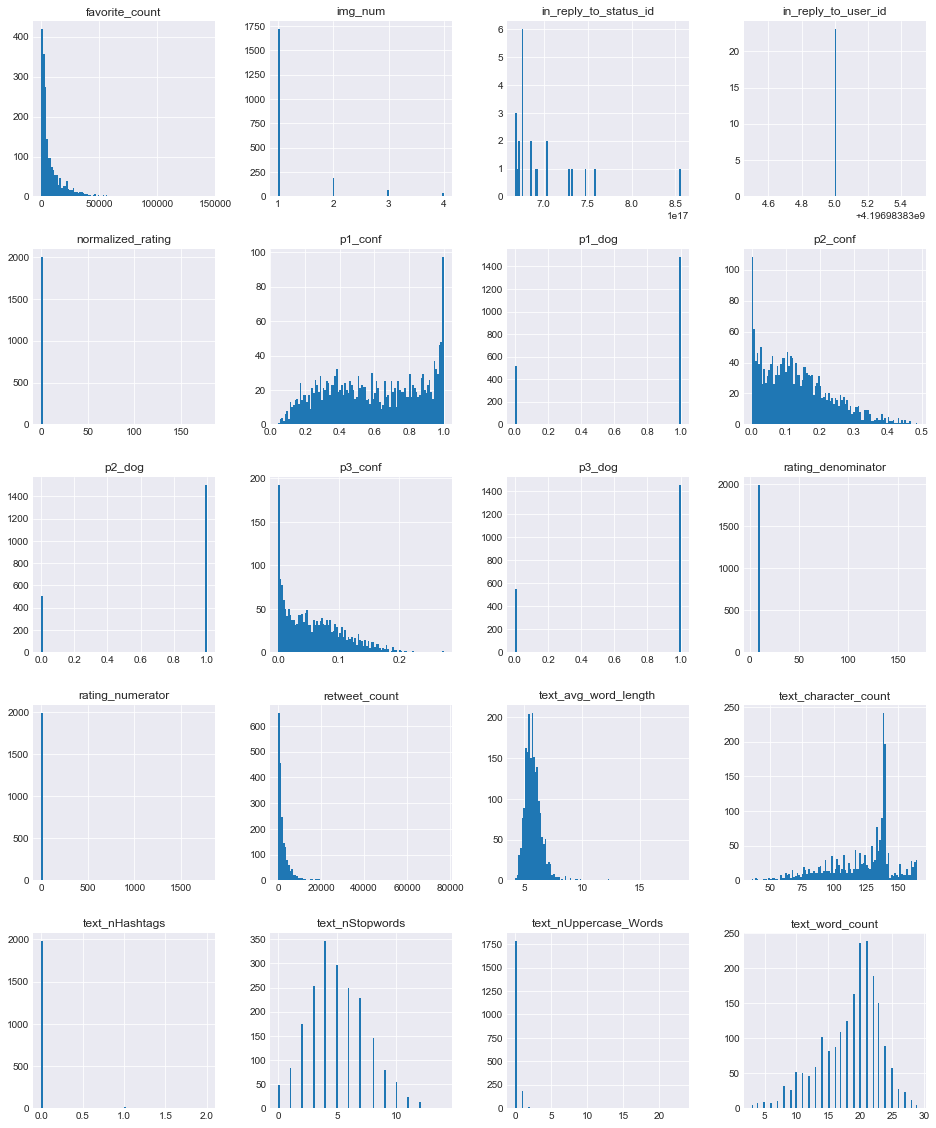

In [6]:
sns.set_style('darkgrid')
df_tweets.hist(figsize=(16, 20), bins=100, xlabelsize=10, ylabelsize=10);

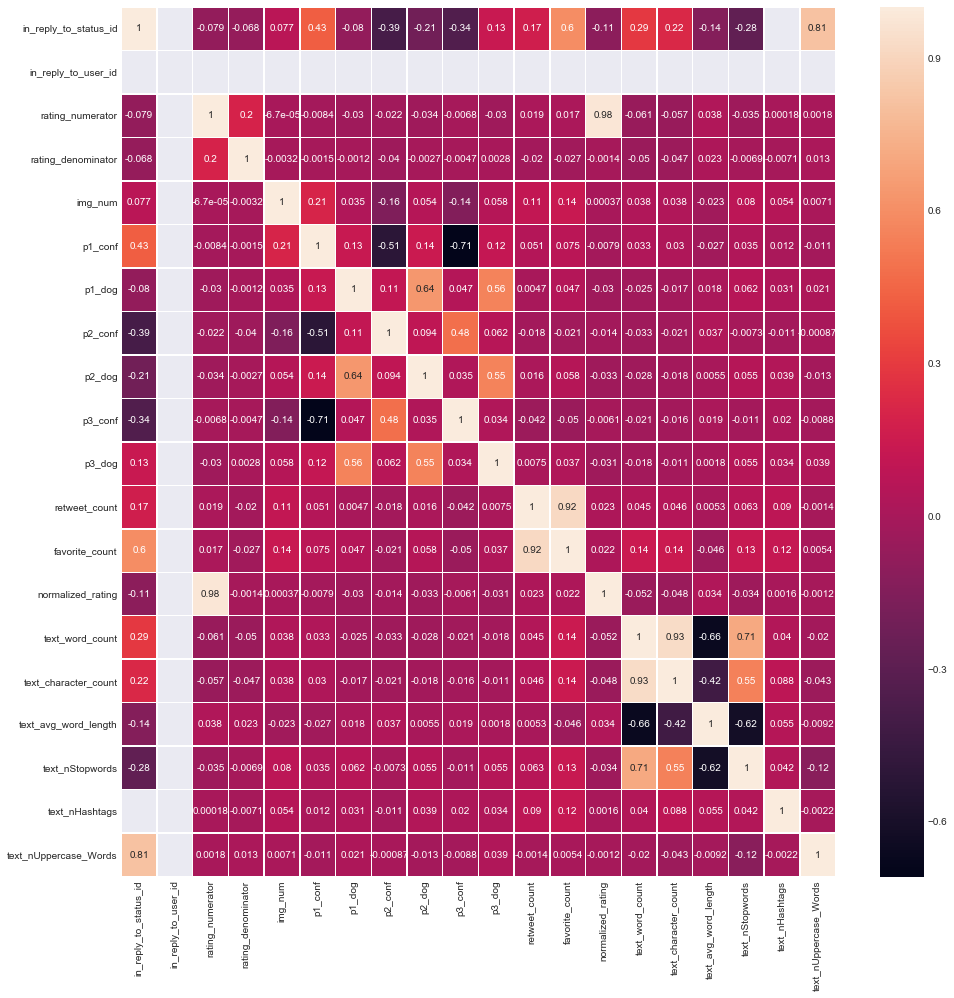

In [7]:
corr = df_tweets.corr()

fig, ax = plt.subplots(figsize=(16,16))

sns.heatmap(ax=ax, data=corr, annot = True, linewidth=.5);

### Fun Insights
***

In [8]:
new_cols = ['tweet_id',
 'timestamp',
 'expanded_urls',
 'rating_numerator',
 'retweet_count',
 'favorite_count',
 'name',
 'gender',
 'dog_type',
 'dog_breed',
 'image_not_dog',
 'text',
 'p1_dog',
 'p1']

df_tweets = df_tweets[new_cols]

In [9]:
plt.style.use('ggplot')
sns.set_context('talk')

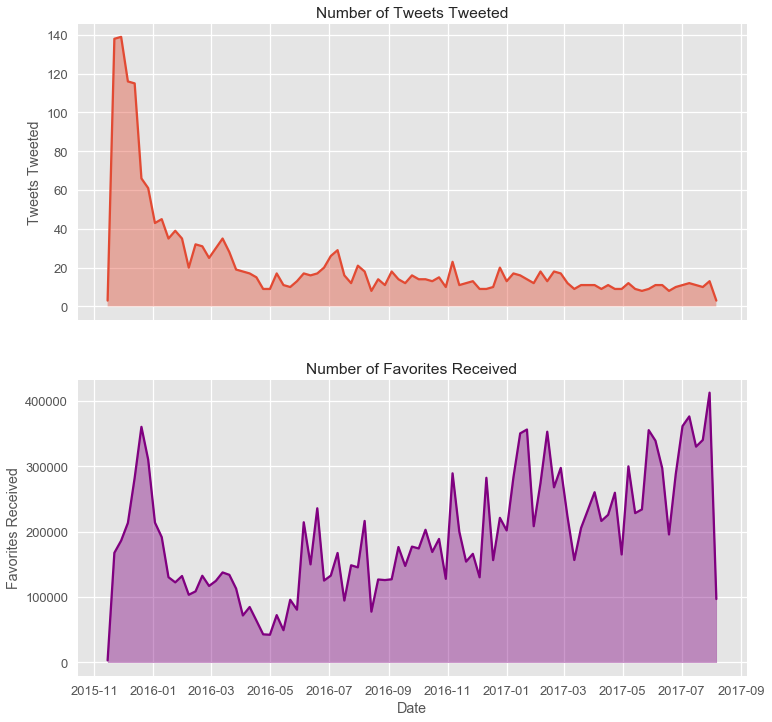

In [10]:
tweets_per_week = df_tweets.groupby(pd.Grouper(key='timestamp', freq='W'))['tweet_id'].count()
x1 = tweets_per_week.index
y1 = tweets_per_week

favorites_per_week = df_tweets.groupby(pd.Grouper(key='timestamp', freq='W'))['favorite_count'].sum()
x2 = favorites_per_week.index
y2 = favorites_per_week

fig, ax = plt.subplots(2,sharex=True, figsize=(12,12))

ax[0].plot(x1, y1) #tweets_per_week
ax[0].fill_between(x1, y1 ,alpha=0.4)

ax[1].plot(x2, y2, color='purple') #favorites_per_week
ax[1].fill_between(x2, y2 ,color='purple',alpha=0.4)

ax[0].set_title('Number of Tweets Tweeted')
ax[0].set_ylabel('Tweets Tweeted')
ax[1].set_title('Number of Favorites Received')
ax[1].set_ylabel('Favorites Received')
ax[1].set_xlabel('Date')

fig.savefig('TweetsVsFaves.png');

In [11]:
tweets_per_week.mean()

21.978021978021978

In [12]:
tweets_per_week.median()

14.0

In [13]:
tweets_per_week.mode()

0    11
dtype: int64

In [11]:
#tweet of a dog
df_tweets[df_tweets['p1_dog'] == True].sample()

,tweet_id,timestamp,expanded_urls,rating_numerator,retweet_count,favorite_count,name,gender,dog_type,dog_breed,image_not_dog,text,p1_dog,p1
1273,686358356425093120,2016-01-11 01:25:58,https://twitter.com/dog_rates/status/686358356425093120/photo/1,10.0,749,2345,NaN,NaN,NaN,pug,NaN,Heartwarming scene here. Son reuniting w father after coming home from deployment. Very moving. 10/10 for both pups https://t.co/95JJevQOWW,True,pug


In [12]:
#tweet not of a dog
df_tweets[df_tweets['p1_dog'] == False].sample()

,tweet_id,timestamp,expanded_urls,rating_numerator,retweet_count,favorite_count,name,gender,dog_type,dog_breed,image_not_dog,text,p1_dog,p1
471,793135492858580992,2016-10-31 17:00:11,"https://twitter.com/dog_rates/status/793135492858580992/photo/1,https://twitter.com/dog_rates/status/793135492858580992/photo/1",13.0,2789,7035,NaN,NaN,NaN,NaN,bakery,Your favorite squad is looking extra h*ckin spooky today. 13/10 for all https://t.co/PrgvOyPtDT,False,bakery


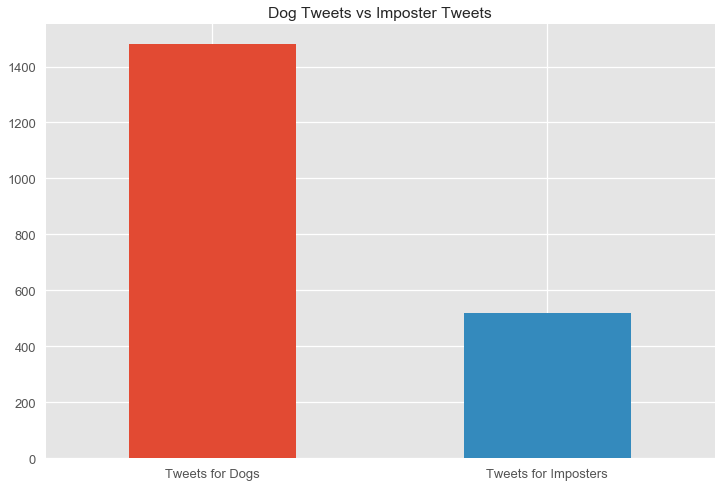

In [13]:
df_tweets.p1_dog.value_counts().plot(kind='bar', figsize=(12,8));
plt.title('Dog Tweets vs Imposter Tweets')
plt.xticks([0,1],['Tweets for Dogs', 'Tweets for Imposters'], rotation=0)

plt.savefig('DogsVsImposters.png');

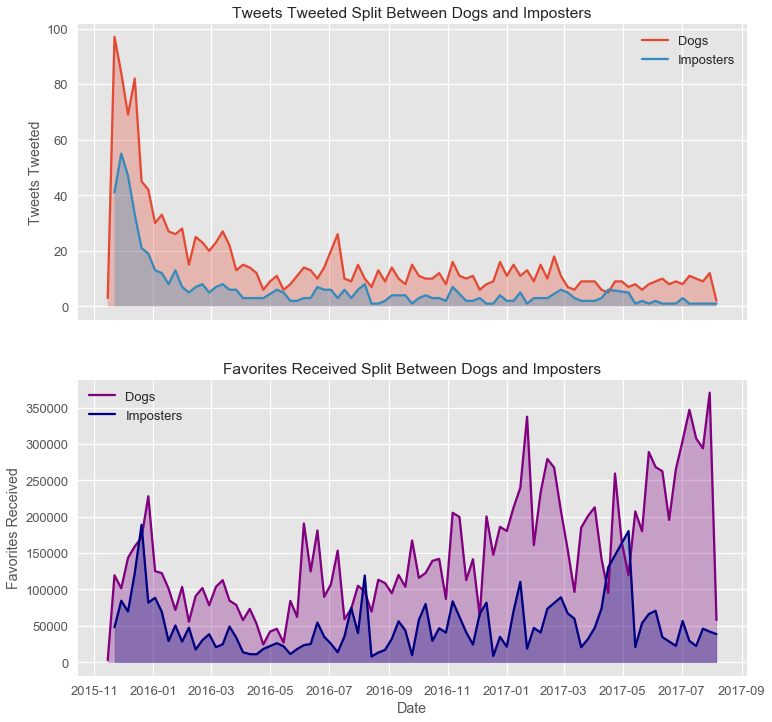

In [14]:
tweets_byP1_Dog = df_tweets.groupby([pd.Grouper(key='timestamp', freq='W'), 'p1_dog'])['tweet_id'].count()
faves_byP1_Dog = df_tweets.groupby([pd.Grouper(key='timestamp', freq='W'), 'p1_dog'])['favorite_count'].sum()

#Tweets about dogs
x1 = tweets_byP1_Dog[:,True].index
y1 = tweets_byP1_Dog[:,True]
#Tweets about things other than dogs
x2 = tweets_byP1_Dog[:,False].index
y2 = tweets_byP1_Dog[:,False]

#Faves for dogs
x3= faves_byP1_Dog[:,True].index
y3= faves_byP1_Dog[:,True]
#Faves for other things
x4= faves_byP1_Dog[:,False].index
y4= faves_byP1_Dog[:,False]

fig, ax = plt.subplots(2,sharex=True, figsize=(12,12))

ax[0].plot(x1, y1, label='Dogs')
ax[0].fill_between(x1, y1 ,alpha=0.3)
ax[0].plot(x2, y2, label='Imposters')
ax[0].fill_between(x2, y2 ,alpha=0.3)

ax[1].plot(x3, y3, color='purple', label='Dogs')
ax[1].fill_between(x3, y3 ,color='purple',alpha=0.3)
ax[1].plot(x4, y4, color='navy', label='Imposters')
ax[1].fill_between(x4, y4 ,color='navy',alpha=0.3)

ax[0].set_title('Tweets Tweeted Split Between Dogs and Imposters')
ax[0].set_ylabel('Tweets Tweeted')
ax[0].legend()
ax[1].set_title('Favorites Received Split Between Dogs and Imposters')
ax[1].set_ylabel('Favorites Received')
ax[1].set_xlabel('Date')
ax[1].legend()

fig.savefig('DogVsImposterTrends.png');

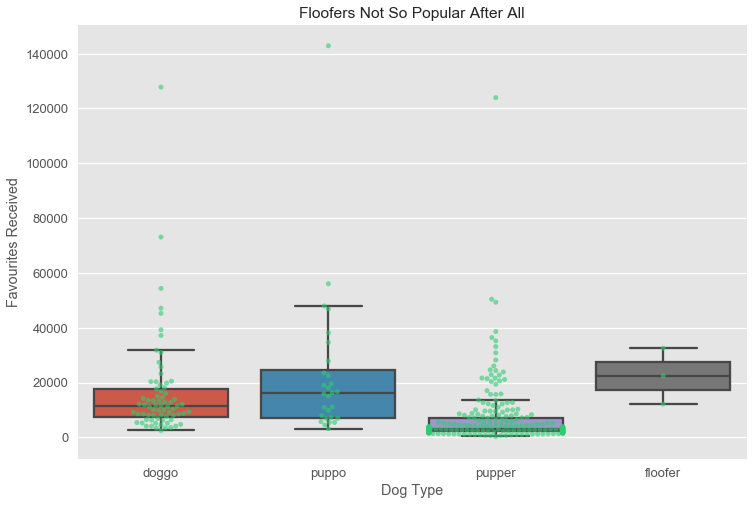

In [45]:
plt.subplots(figsize=(12,8))

x = df_tweets.dog_type
y = df_tweets.favorite_count

ax = sns.boxplot(x=x, y=y, showfliers=False)
ax = sns.swarmplot(x=x, y=y, color="#2ecc71", alpha=0.6)
plt.xlabel('Dog Type')
plt.ylabel('Favourites Received')
plt.title('Floofers Not So Popular After All')

fig = ax.get_figure()
fig.savefig('ByDogTypes.png');

In [21]:
df_tweets[df_tweets.dog_type == 'pupper'].sort_values(by='favorite_count', ascending=False).head(1)

,tweet_id,timestamp,expanded_urls,rating_numerator,retweet_count,favorite_count,name,gender,dog_type,dog_breed,image_not_dog,text,p1_dog,p1
108,866450705531457537,2017-05-22 00:28:40,"https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13.0,36236,123960,Jamesy,male,pupper,French_bulldog,NaN,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",True,French_bulldog


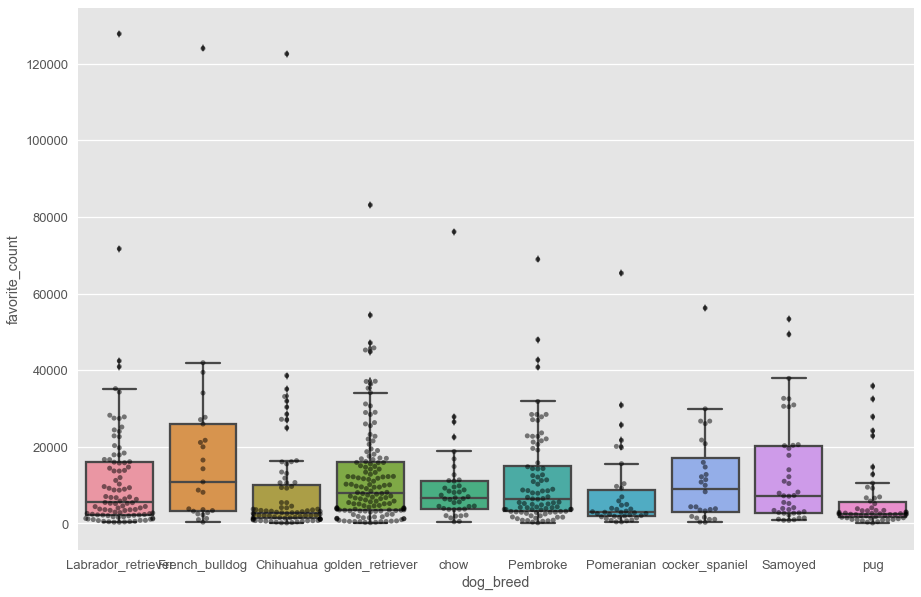

In [17]:
byBreed = df_tweets.groupby(['dog_breed'])['favorite_count'].agg([sum, 'count'])
byBreed = byBreed.sort_values(by='sum', ascending=False)

top_10_fave_breeds = byBreed[:10]
faveBreeds = top_10_fave_breeds.index #list of favorite dog breeds

fig, ax = plt.subplots(figsize=(15,10))

top10_faveBreeds = df_tweets[df_tweets.dog_breed.isin(faveBreeds)].sort_values(by='favorite_count', ascending=False)

x = top10_faveBreeds.dog_breed
y = top10_faveBreeds.favorite_count

sns.boxplot(x=x, y=y)
sns.swarmplot(x=x, y=y, color='black', alpha=.5);

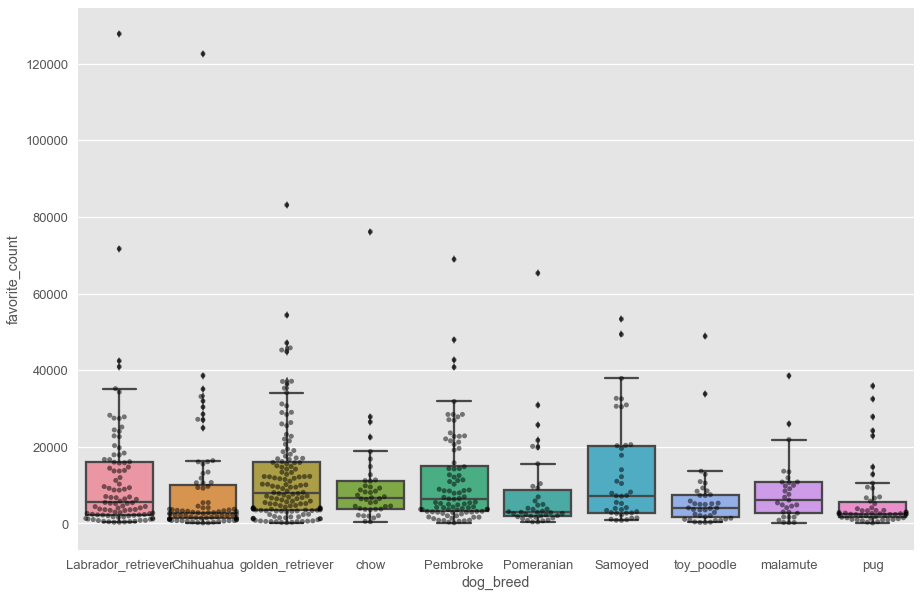

In [18]:
top_10_most_tweeted_breeds = byBreed.sort_values(by='count', ascending=False)[:10]
mostTweetedBreeds = top_10_most_tweeted_breeds.index #list of breed with most tweets

fig, ax = plt.subplots(figsize=(15,10))

top10_mostTweetedBreeds = df_tweets[df_tweets.dog_breed.isin(mostTweetedBreeds)].sort_values(by='favorite_count', ascending=False)

x = top10_mostTweetedBreeds.dog_breed
y = top10_mostTweetedBreeds.favorite_count

sns.boxplot(x=x, y=y)
sns.swarmplot(x=x, y=y, color='black', alpha=.5);

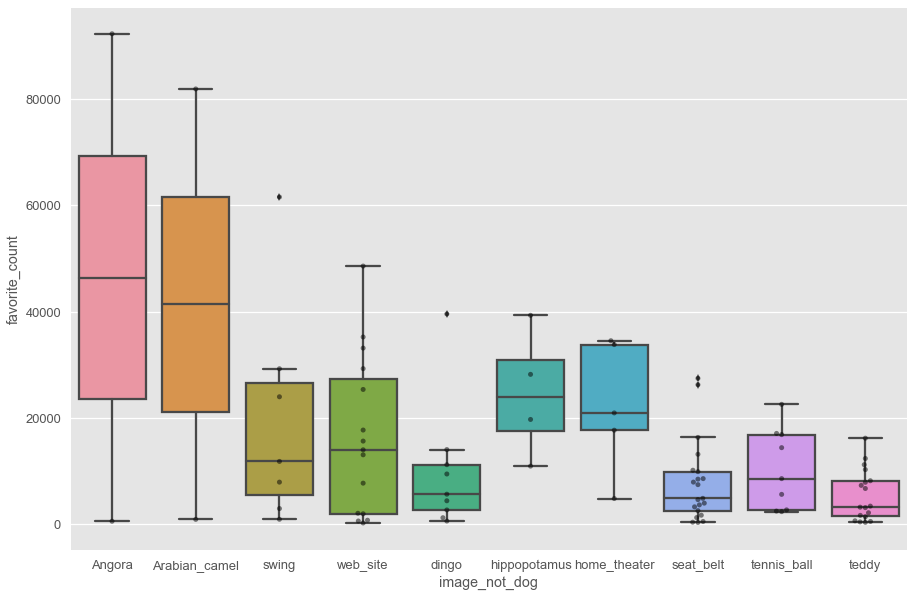

In [48]:
byImage = df_tweets.groupby(['image_not_dog'])['favorite_count'].agg([sum, 'count', 'mean'])
byImage = byImage.sort_values(by='sum', ascending=False)

top_10_fave_images = byImage[:10]
faveImages = top_10_fave_images.index #list of favorite images

fig, ax = plt.subplots(figsize=(15,10))

top10_faveImages = df_tweets[df_tweets.image_not_dog.isin(faveImages)].sort_values(by='favorite_count', ascending=False)

x = top10_faveImages.image_not_dog
y = top10_faveImages.favorite_count

sns.boxplot(x=x, y=y)
sns.swarmplot(x=x, y=y, color='black', alpha=.5);

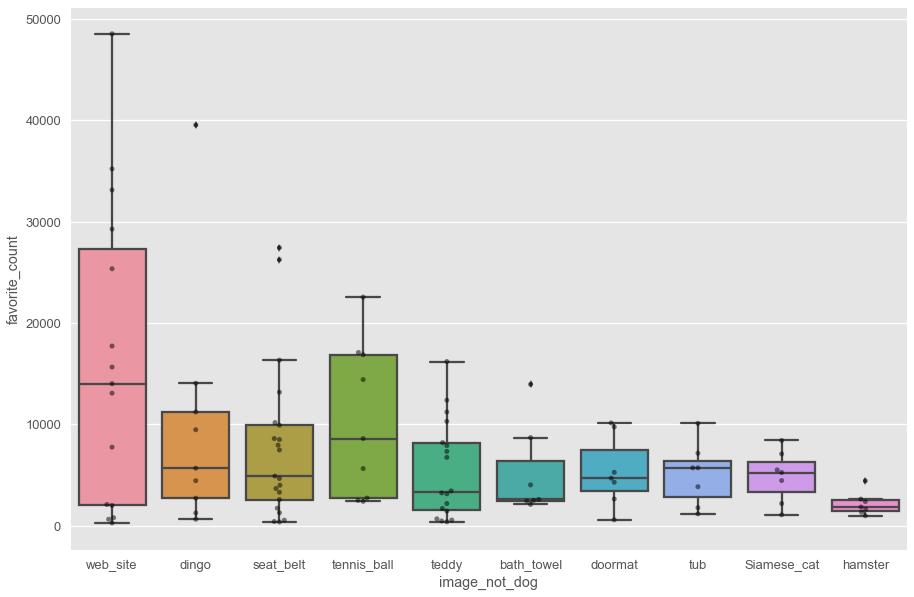

In [20]:
top_10_most_tweeted_images = byImage.sort_values(by='count', ascending=False)[:10]
mostTweetedImages = top_10_most_tweeted_images.index #list of breed with most tweets

fig, ax = plt.subplots(figsize=(15,10))

top10_mostTweetedImages = df_tweets[df_tweets.image_not_dog.isin(mostTweetedImages)].sort_values(by='favorite_count', ascending=False)

x = top10_mostTweetedImages.image_not_dog
y = top10_mostTweetedImages.favorite_count

sns.boxplot(x=x, y=y)
sns.swarmplot(x=x, y=y, color='black', alpha=.5);

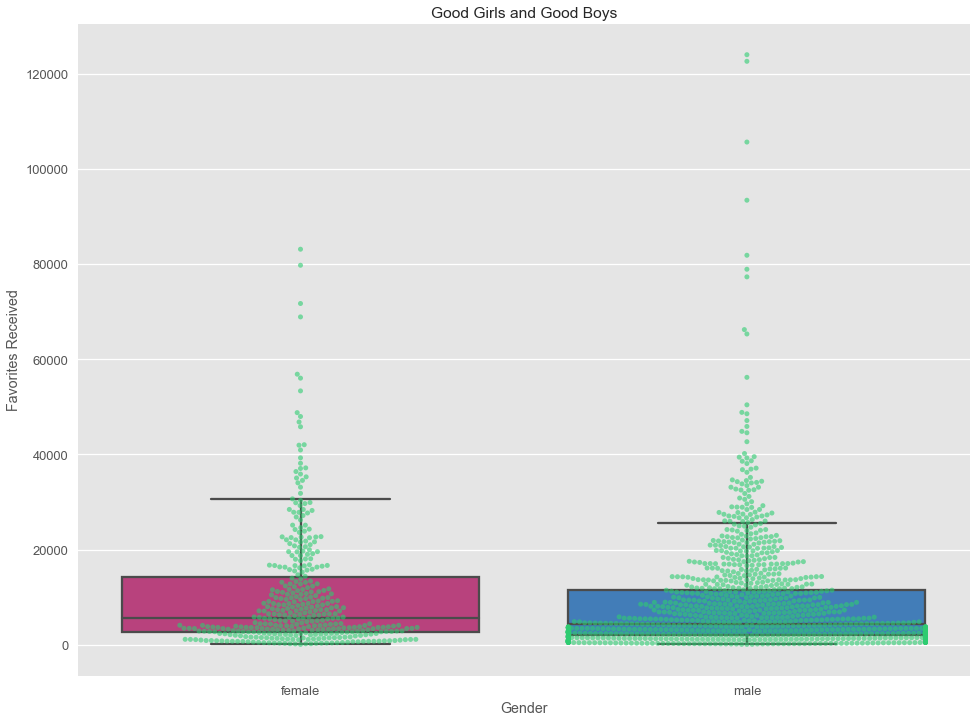

In [43]:
gender = ['#cc2e7d', '#2e7dcc']
plt.subplots(figsize=(16,12))

x = df_tweets.gender
y = df_tweets.favorite_count

ax = sns.boxplot(x=x, y=y, showfliers=False, palette=gender)
ax = sns.swarmplot(x=x, y=y, color="#2ecc71", alpha=0.6)
plt.xlabel('Gender')
plt.ylabel('Favorites Received')
plt.title('Good Girls and Good Boys')

fig = ax.get_figure()
fig.savefig('GoodGirlsVsGoodBoys.png');

In [22]:
df_tweets[df_tweets.gender == 'female'].sort_values(by='favorite_count', ascending=False).head(1)

,tweet_id,timestamp,expanded_urls,rating_numerator,retweet_count,favorite_count,name,gender,dog_type,dog_breed,image_not_dog,text,p1_dog,p1
93,870374049280663552,2017-06-01 20:18:38,https://twitter.com/dog_rates/status/870374049280663552/photo/1,13.0,26679,83107,Zoey,female,NaN,golden_retriever,NaN,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm,True,golden_retriever


In [23]:
df_tweets[df_tweets.gender == 'male'].sort_values(by='favorite_count', ascending=False).head(1)

,tweet_id,timestamp,expanded_urls,rating_numerator,retweet_count,favorite_count,name,gender,dog_type,dog_breed,image_not_dog,text,p1_dog,p1
108,866450705531457537,2017-05-22 00:28:40,"https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13.0,36236,123960,Jamesy,male,pupper,French_bulldog,NaN,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",True,French_bulldog


In [22]:
favesbyImage = df_tweets.groupby(['p1_dog', 'p1'])['favorite_count'].agg(['count', sum])
favesbyImage['is_dog'] = favesbyImage.index.get_level_values(0)
favesbyImage = favesbyImage.reset_index(level=0, drop=True).rename(columns={'count':'tweet_count', 'sum':'favorite_count'})

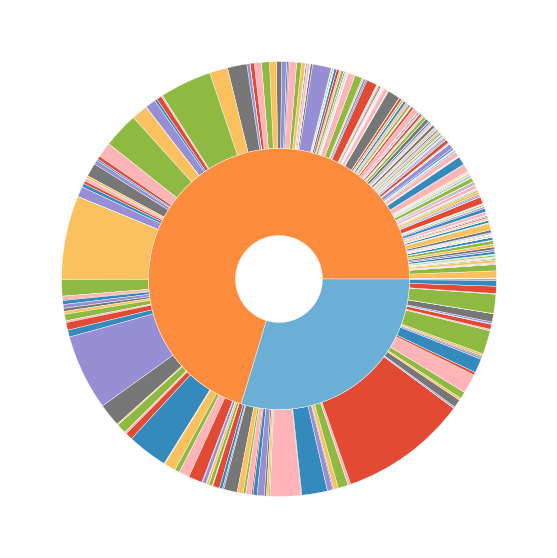

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
size = 0.4
cmap = plt.get_cmap("tab20c")

outer = favesbyImage['favorite_count'].values

inner = favesbyImage['is_dog'].value_counts()
inner_colors = cmap(np.array([5,1]))


ax.pie(outer, radius=1, wedgeprops=dict(width=size, edgecolor='w'))
ax.pie(inner, radius=1-size, wedgeprops=dict(width=size, edgecolor='w'), colors=inner_colors)
ax.set(aspect="equal");